## Instalación de Librerias 

In [33]:
!pip install auto-sklearn
!pip install PipelineProfiler
!pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 54.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 82.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 87.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 28.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 5.8 MB/s eta 0:00:00
  Created wheel for auto-sklear

In [2]:
##en caso de error favor de reiniciar el kernel  (reiniciar entorno de ejecución)
import autosklearn.regression

In [3]:
###Carga de Librerias
import pandas as pd
import numpy as np
import re
import seaborn as sns
from numpy import float64

### para realizar regresiones
import statsmodels.formula.api as sm
from statsmodels.api import datasets


from pprint import pprint
import sklearn.datasets
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn import  preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## Preprocesamiento


1. Lectura de Archivos ;  definicion correcta de data frames   
2. Definimos funciones especiales para las variables cut, color y claridad
3. Se corrige un error en la variables "latitude"   
4. Se corrige el nombre de la variable "longitude"

5. Se utilizan modelos de regresión para imputar los valores faltantes de "depth", "x" e "y"


Nota: Resulta importante la siguiente imagen  para entender la claridad.
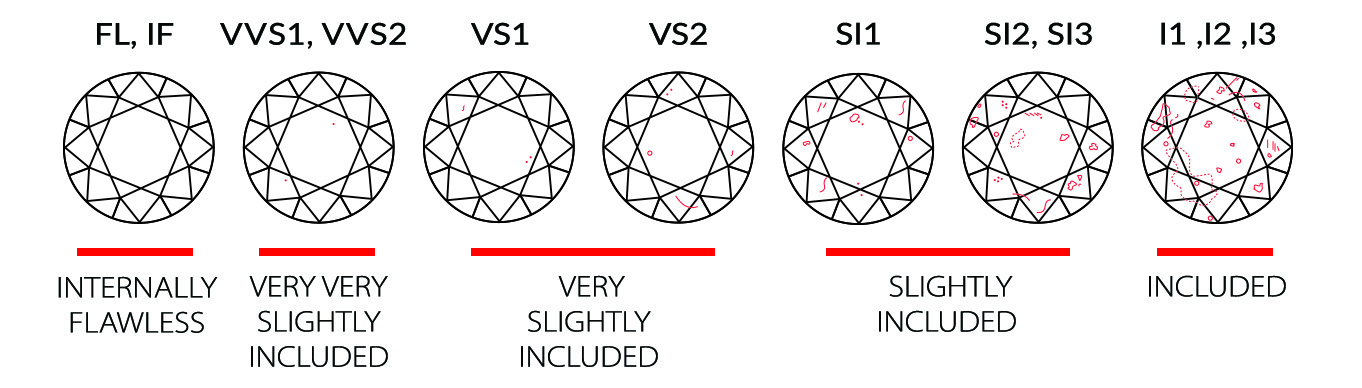

In [4]:
### funciones para realizar preprocesamiento de datos
def corregir_cut(x):
  if x=='!Good' or x=='G#ood' or x=='Go?od' :
    return 'Good'
  if x=='#Very Good' or x=="V&ery Good" or x=="Very *'Good" or x=="Very G#ood" or x=="Very Go#od" or x=="Very Goo!d" :
    return 'Very Good'
  if x=='&Ideal' or x=="*'Ideal" or x=="I#deal" or x=="Id!eal" or x=="Ide!al" or x=="Ide&al" or x=="Ide*'al"   :
    return 'Ideal'
  if x=="P*'remium" or x=="P?remium"  or x=="Pr?emium" or x=="Pre!mium"  :
    return 'Premium'
  return 'Good'

def corregir_color(x):
  if x=="#D" :
    return 'D'
  if x=="!E" or x=="&E" or x=="*'E" or x=="?E":
    return 'E'
  if x=="!F" or x=="&F" or x=="*'F" or x=="#F" :
    return 'F'
  if x=="#G" or x=="&G" or x=="?G" :
    return 'G'
  if x=="!H" or x=="#H" or x=="?H" :
    return 'H'
  if x=="!I" or x=="&I" or x=="*'I" :
    return 'I'
  if x=="?J":
    return 'J'
  return x


def corregir_claridad(x):
  if x=="#VS1" or x=="VS?1":
    return 'VS1'
  if x=="VV#S1" or x=="VV?S1" :
    return 'VVS1'
  if x=="!VS2" or x=="&VS2" or x=="V!S2" or x=="V#S2"or x=="V&S2" or x=="VS#2":
    return 'VS2'
  if x=="VVS*'2" or x=="VVS2":
    return 'VVS2'
  if x=="#SI!1" or x=="*'SI1" or x=="S&I1" or x=="S*'I1" or x=="S?I1"  or x=="SI?1" or x=="SI!1":
    return 'SI1'
  if x=="&SI2" or x=="*'SI2" or x=="S!I2" or x=="S*'I2" :
    return 'SI2'
  if x=="I1" or x=="&I" or x=="*'I" :
    return 'I1'
  if x=="IF" :
    return 'IF'
  return x

In [5]:
##lectura de archivos
df_cordenadas_diamantes = pd.read_csv('/content/drive/MyDrive/diamonds/coords_diamonds.csv').iloc[:,1:]
df_diamantes_info = pd.read_csv('/content/drive/MyDrive/diamonds/diamonds.csv').iloc[:,1:]

##unir en un unico data frame
df_diamantes = pd.concat([df_diamantes_info,df_cordenadas_diamantes],axis=1)

In [7]:
##nos percatamos que la variable longitud deberia ser float64, 
#es decir hay un error con la columna pues lo que deberia ser un numero contiene la letra q
df_diamantes['latitude'] = df_diamantes['latitude'].apply(lambda x: float64(str(x).replace('q', '')))

##cambiamos el nombre de "longitude " a "longitude"
#df_diamantes = 
df_diamantes = df_diamantes.rename(columns={'longitude ' : 'longitude'})

##definimos funciones especiales para las variables cut, color y claridad
df_diamantes['cut']=df_diamantes['cut'].apply(corregir_cut)
df_diamantes['color']=df_diamantes['color'].apply(corregir_color)
df_diamantes['clarity']=df_diamantes['clarity'].apply(corregir_claridad)

In [8]:
print('Las variables continuas son: \n ',(df_diamantes[df_diamantes.describe().columns]).columns,'\n\n')

print('Las variables categoricas son: \n ',(df_diamantes.drop(df_diamantes.describe().columns,axis=1)).columns)

Las variables continuas son: 
  Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'latitude',
       'longitude'],
      dtype='object') 


Las variables categoricas son: 
  Index(['cut', 'color', 'clarity'], dtype='object')


In [9]:
##
print('la cantidad de datos nullos es:',df_diamantes.isna().sum())
#print('la cantidad de datos nullos es:',df_diamantes.isna().sum())

#Contruir un dataframe que contenga solo variables continuas tal que podamos 
#hacer regresiones sobre dichas variables:
df_variables_continuas = df_diamantes[df_diamantes.describe().columns]
df_variables_continuas = df_variables_continuas.drop(["price","latitude","longitude"],axis=1, )

la cantidad de datos nullos es: carat           0
cut             0
color           0
clarity         0
depth        2962
table           0
price           0
x            1090
y             585
z               0
latitude        0
longitude       0
dtype: int64


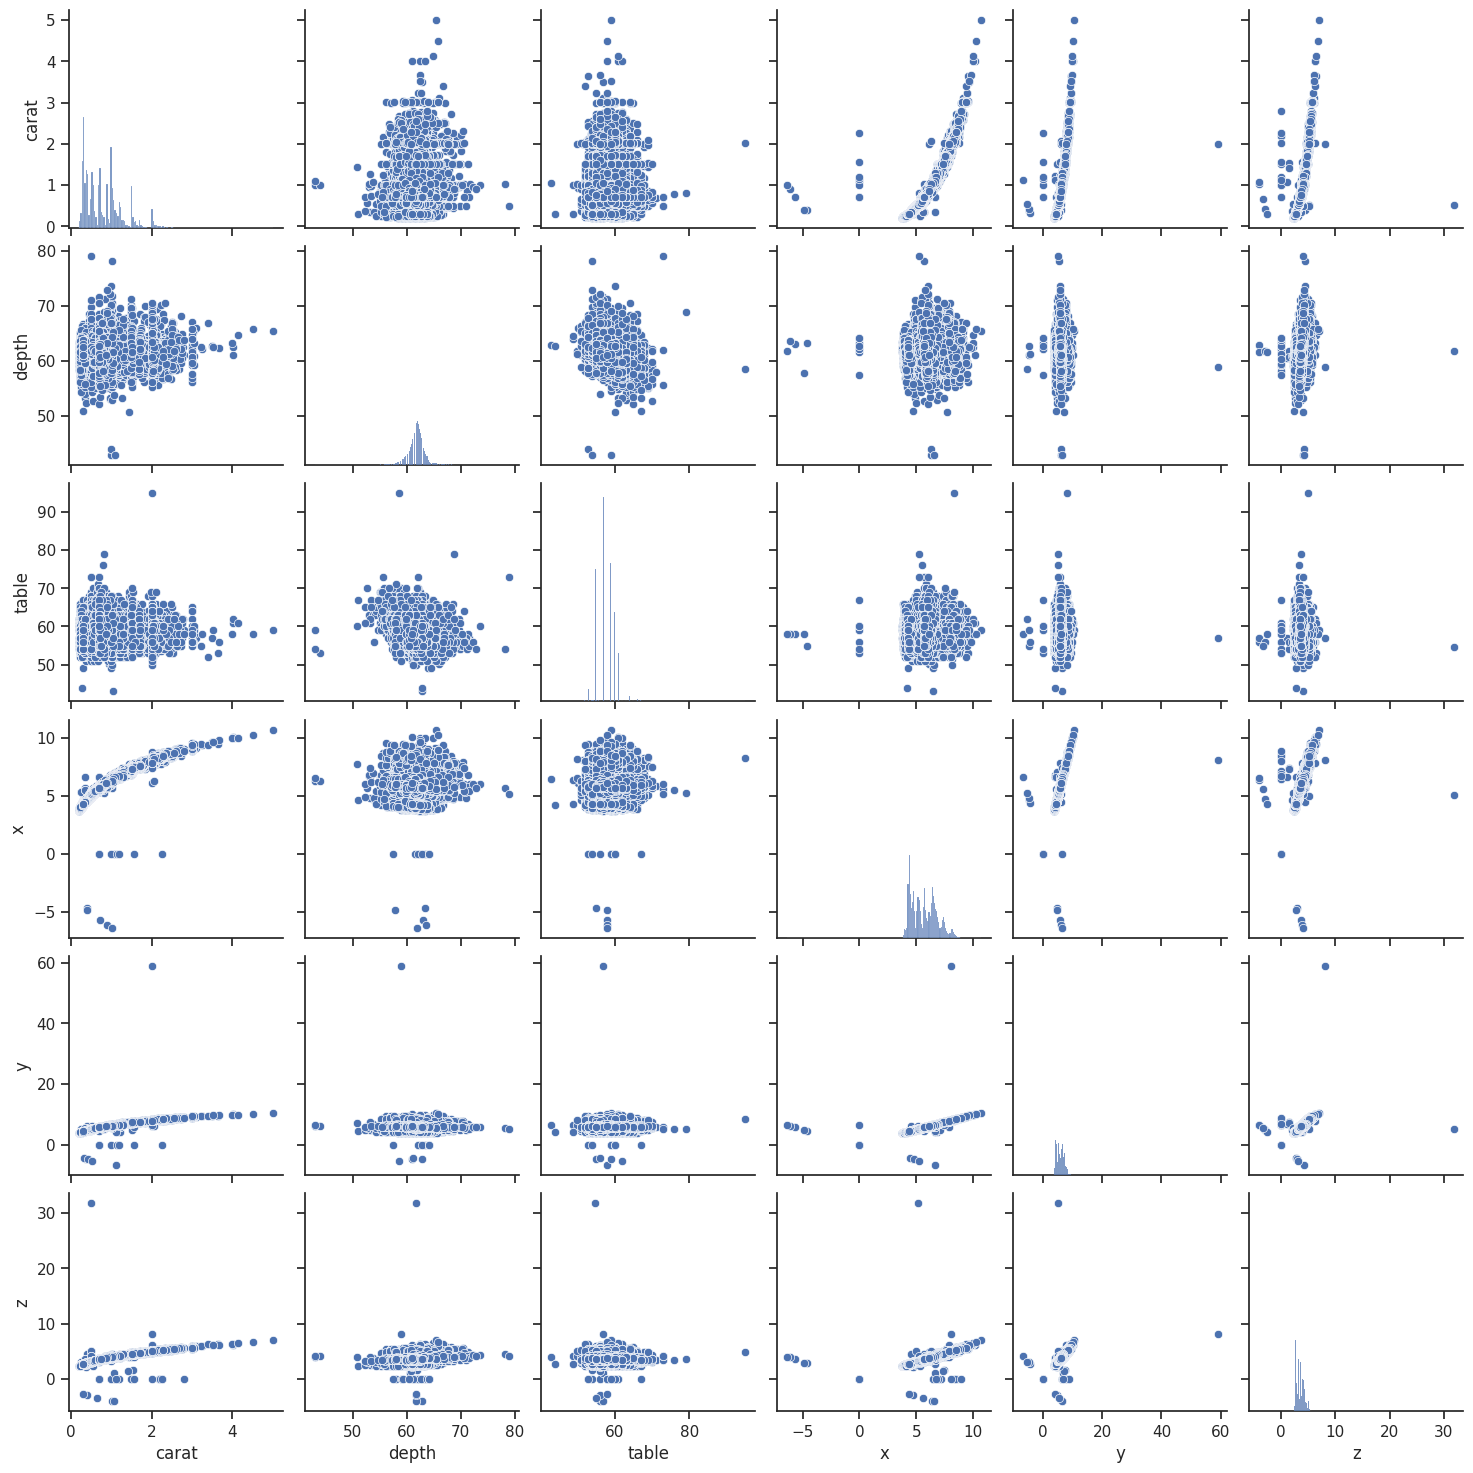

In [12]:
##grafica para encontrar regresiones 

sns.set_theme(style="ticks")
sns.pairplot(df_variables_continuas)

De la grafica anterior visualmente podemos ver que podemos observar una cierta correlación lineal entre algunas variables continuas 

Para no sustituir los numeros por valores promedios o medianas simples,  planteamos el hecho de construir un regresor sobre otras variables que no tengan datos faltantes.

In [13]:
##modelo 1

##eliminar todos los registros que tuvieran nulos para realizar los ajustes de regresion solo con 
##valores validos
df_regresion = df_variables_continuas.dropna()
model = sm.ols('depth' + ' ~ ' + 'table+carat+z', df_regresion).fit()

## buscar los valores sobre los que tenemos que hacer regresion
df_nulos = df_variables_continuas[df_variables_continuas['depth'].isnull()]
y_depth_predict = model.predict(df_nulos[['table','carat','z']])
print(model.summary())


##modelo 2
model = sm.ols('x' + ' ~ ' + 'table+carat+z', df_regresion).fit()

## buscar los valores sobre los que tenemos que hacer regresion
df_nulos = df_variables_continuas[df_variables_continuas['x'].isnull()]
y_x_predict = model.predict(df_nulos[['table','carat','z']])
print(model.summary())


##modelo 3
model = sm.ols('y' + ' ~ ' + 'table+carat+z', df_regresion).fit()
## buscar los valores sobre los que tenemos que hacer regresion
df_nulos = df_variables_continuas[df_variables_continuas['x'].isnull()]
y_y_predict = model.predict(df_nulos[['table','carat','z']])
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  depth   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     2587.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        07:14:34   Log-Likelihood:                -87042.
No. Observations:               50968   AIC:                         1.741e+05
Df Residuals:                   50964   BIC:                         1.741e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.6450      0.170    408.733      0.0

In [14]:
### notese que las variables  y_depth_predict, y_x_predict & y_y_predict
###contienen los valores nulos a sustituir que hemos probado 

df_diamantes['depth'] = df_diamantes['depth'].fillna(y_depth_predict) 
df_diamantes['x'] = df_diamantes['x'].fillna(y_x_predict) 
df_diamantes['y'] = df_diamantes['y'].fillna(y_y_predict) 

#Nota: Las variables x e y fueron bien sustituidas pues los modelos de regresión nos indican ello.
#por otra parte el sustituir los valores de la variable depth requiere un analisis mas a profundidad.


In [15]:
##Para este punto
print('la cantidad de datos nullos es:',df_diamantes.isna().sum())

la cantidad de datos nullos es: carat        0
cut          0
color        0
clarity      0
depth        0
table        0
price        0
x            0
y            0
z            0
latitude     0
longitude    0
dtype: int64


In [16]:
##Convertir los datos categoricos a datos numericos
enc = preprocessing.OrdinalEncoder()
df_diamantes['cut'] = enc.fit_transform(df_diamantes[['cut']])
df_diamantes['clarity'] = enc.fit_transform(df_diamantes[['clarity']])
df_diamantes['color'] = enc.fit_transform(df_diamantes[['color']])

## Modelos de regresión para predecir el precio de piedras preciosas

---

Existen diversas alternativas y modelos para elegir, ultimamente he decido usar automl en mi vida profesional para realizar series de tiempo por lo que he decido tambien incluirlo en la presente prueba, la idea es explorar una diversidad de modelos mas alla de las regresiones lineales y tener una ayuda automatizada para saber que modelo elegir.




1.   Particion Train-Test-Validation
2.   Uso de AutoSklearnRegressor (fit)
3.   Revisión del modelo elegido
4.   Vistazo a los residuales

In [17]:
## separacion de la variable independiente "precio" 
X, y = df_diamantes.drop(["price"],axis=1), df_diamantes[["price"]]
## creación de conjuntos de Train-Test-Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1)

In [18]:
## Carga de AutoSkelearnRegressor
automl = autosklearn.regression.AutoSklearnRegressor(
    metric=autosklearn.metrics.mean_absolute_error,
    time_left_for_this_task=60*8,
    per_run_time_limit=40,
    resampling_strategy="holdout",
    resampling_strategy_arguments={"train_size": 0.67})
automl.fit(X_train, y_train, dataset_name="diamantes")

[WARNING] [2023-05-29 07:15:19,832:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-05-29 07:16:00,959:Client-EnsembleBuilder] No runs were available to build an ensemble from


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     metric=mean_absolute_error, per_run_time_limit=40,
                     resampling_strategy_arguments={'train_size': 0.67},
                     time_left_for_this_task=480)

In [19]:
## impresión de los modelos analizados
print(automl.leaderboard())
print(automl.sprint_statistics())

          rank  ensemble_weight               type        cost   duration
model_id                                                                 
6            1             0.46  gradient_boosting  299.841775   5.590122
5            2             0.22  gradient_boosting  309.425393  22.755272
10           3             0.04  gradient_boosting  318.119920   1.443888
4            4             0.16  gradient_boosting  318.589234  26.453913
17           5             0.12        extra_trees  328.565152   9.709192
auto-sklearn results:
  Dataset name: diamantes
  Metric: mean_absolute_error
  Best validation score: 299.841775
  Number of target algorithm runs: 23
  Number of successful target algorithm runs: 12
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 9
  Number of target algorithms that exceeded the memory limit: 2



In [20]:
## ayuda visual del mejor modelo elegido

model_leadership = automl.leaderboard(detailed = True,ensemble_only=False,sort_order="descending")
model_leadership

rank  ensemble_weight                 type         cost   duration  \
model_id                                                                       
6            1             0.46    gradient_boosting   299.841775   5.590122   
5            2             0.22    gradient_boosting   309.425393  22.755272   
18           3             0.00    gradient_boosting   312.969226  30.006521   
10           4             0.04    gradient_boosting   318.119920   1.443888   
4            5             0.16    gradient_boosting   318.589234  26.453913   
17           6             0.12          extra_trees   328.565152   9.709192   
12           7             0.00  k_nearest_neighbors   472.344752   1.553736   
20           8             0.00                  mlp   498.590097  18.840724   
11           9             0.00       ard_regression   636.830819   2.040410   
8           10             0.00       ard_regression   845.033758   1.150672   
14          11             0.00    gradient_boosting  2884.273657   1.473349   
16          12             0.00    gradient_boosting  2885.879940   0.817401   

          config_id   train_loss  seed    start_time      end_time  budget  \
model_id                                                                     
6                 5   149.844910     0  1.685345e+09  1.685345e+09     0.0   
5                 4    54.831750     0  1.685345e+09  1.685345e+09     0.0   
18               17    76.981874     0  1.685345e+09  1.685345e+09     0.0   
10                9   275.263291     0  1.685345e+09  1.685345e+09     0.0   
4                 3    90.307733     0  1.685345e+09  1.685345e+09     0.0   
17               16   261.617684     0  1.685345e+09  1.685345e+09     0.0   
12               11     0.000000     0  1.685345e+09  1.685345e+09     0.0   
20               19   474.237665     0  1.685345e+09  1.685345e+09     0.0   
11               10   609.966578     0  1.685345e+09  1.685345e+09     0.0   
8                 7   847.054036     0  1.685345e+09  1.685345e+09     0.0   
14               13  2907.359814     0  1.685345e+09  1.685345e+09     0.0   
16               15  2909.782441     0  1.685345e+09  1.685345e+09     0.0   

                      status data_preprocessors      feature_preprocessors  \
model_id                                                                     
6         StatusType.SUCCESS                 []    [feature_agglomeration]   
5         StatusType.SUCCESS                 []               [polynomial]   
18        StatusType.SUCCESS                 []               [polynomial]   
10        StatusType.SUCCESS                 []    [feature_agglomeration]   
4         StatusType.SUCCESS                 []               [polynomial]   
17        StatusType.SUCCESS                 []         [no_preprocessing]   
12        StatusType.SUCCESS                 []  [select_rates_regression]   
20        StatusType.SUCCESS                 []               [polynomial]   
11        StatusType.SUCCESS                 []               [polynomial]   
8         StatusType.SUCCESS                 []  [select_rates_regression]   
14        StatusType.SUCCESS                 []               [polynomial]   
16        StatusType.SUCCESS                 []  [select_rates_regression]   

         balancing_strategy   config_origin  
model_id                                     
6                      None  Initial design  
5                      None  Initial design  
18                     None  Initial design  
10                     None  Initial design  
4                      None  Initial design  
17                     None  Initial design  
12                     None  Initial design  
20                     None  Initial design  
11                     None  Initial design  
8                      None  Initial design  
14                     None  Initial design  
16                     None  Initial design

In [21]:
import PipelineProfiler
profiler_data = PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

In [22]:
# resumen
print(automl.sprint_statistics())

# evaluando el conjunto test
y_hat = automl.predict(X_test)
mae = mean_absolute_error(y_test, y_hat)
print("MAE: %.3f" % mae)

# evaluando el conjunto validación
y_hat = automl.predict(X_val)
mae = mean_absolute_error(y_val, y_hat)
print("MAE: %.3f" % mae)

auto-sklearn results:
  Dataset name: diamantes
  Metric: mean_absolute_error
  Best validation score: 299.841775
  Number of target algorithm runs: 23
  Number of successful target algorithm runs: 12
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 9
  Number of target algorithms that exceeded the memory limit: 2

MAE: 184.600
MAE: 288.563
MAE: 294.175


<Axes: >

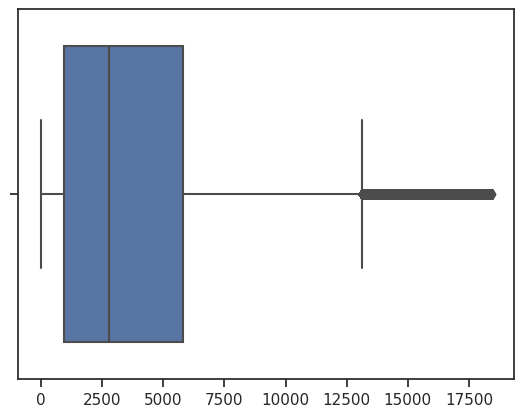

In [24]:
##obtener las diferencias y graficar las mismas para poder entender
## cual es el error que tenemos con nuestro modelo de regresión
diferencias = np.abs(np.array(y_val)-np.array(y_hat))
sns.boxplot(x=diferencias[:int(len(diferencias)*0.5)])

In [26]:
print('quantiles de precios [1%,50%, 99%]: \n  ',np.quantile(y_val,[0.01,0.5,0.99]))
print('\n\n quantiles de diferencias real-pronosticado [1%,50%, 99%] :  \n',np.quantile(diferencias,[0.01,0.5,0.99]))

quantiles de precios [1%,50%, 99%]: 
   [  421.    2359.   17475.25]


 quantiles de diferencias real-pronosticado [1%,50%, 99%] :  
 [   24.72240448  2752.84212494 15911.93463135]


### Comentarios sobre las regresiones


*    Durante diversas pruebas; antes y despues del preprocesamiento el regresor gradient_boosting fue el que tuvo el mejor desempeño.

*    Considero que aun tenemos un error muy grande y falta trabajo por realizar.

*    Las pruebas de test y validación son consistentes por lo que no tenemos un modelo sobreajustado.
